# Take Home Challenge-1: Ultimate Challenge

## Part 1-EDA-Exploratory Data Analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import libraries
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime

### Read Data 

In [2]:
#check logins
logins = pd.read_json('logins.json')
logins.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [3]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


The first day login was 1970-01-01 20:12:16 and the last day login was 1970-04-13 18:57:38.

In [4]:
#Count the login and set new index as 'login_time'
logins['count'] = 1
df = logins.set_index('login_time')
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
#resample the data for 15 mins intervals and count
intervals = df.resample('15T').sum()
intervals.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<Figure size 1152x288 with 0 Axes>

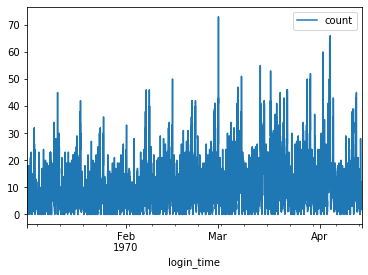

In [6]:
plt.figure(figsize=(16,4)) # The entire data set
intervals.plot()

In [7]:
#Resample the data into hourly averages and look at the patterns for each full month.
intervals_hourly = intervals.resample('H').mean()

In [8]:
intervals_hourly['month'] = intervals_hourly.index.month
intervals_hourly['day'] = intervals_hourly.index.day
intervals_hourly['hour'] = intervals_hourly.index.hour
intervals_hourly['weekday'] = 'Maybe'
intervals_hourly['weekend'] = 'Maybe'
intervals_hourly.head()

,count,month,day,hour,weekday,weekend
login_time,,,,,,
1970-01-01 20:00:00,6.00,1,1,20,Maybe,Maybe
1970-01-01 21:00:00,2.25,1,1,21,Maybe,Maybe
1970-01-01 22:00:00,5.25,1,1,22,Maybe,Maybe
1970-01-01 23:00:00,14.50,1,1,23,Maybe,Maybe
1970-01-02 00:00:00,13.25,1,2,0,Maybe,Maybe


In [9]:
#Resample each month login
january = intervals_hourly[intervals_hourly['month'] == 1]
february = intervals_hourly[intervals_hourly['month'] == 2]
march = intervals_hourly[intervals_hourly['month'] == 3]

In [10]:
#Groupby each month login and average by hour
january_hourly = january.groupby(['hour']).mean()
february_hourly = february.groupby(['hour']).mean()
march_hourly = march.groupby(['hour']).mean()

Text(0.5, 1.0, 'Fig 1 - January Daily Cycle of Useage')

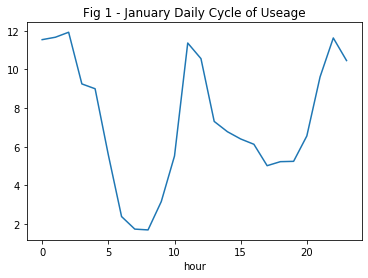

In [11]:
#Plot January daily login
january_hour = january_hourly['count'].plot()
january_hour.set_title('Fig 1 - January Daily Cycle of Useage')

Text(0.5, 1.0, 'Fig 2 - February Daily Cycle of Useage')

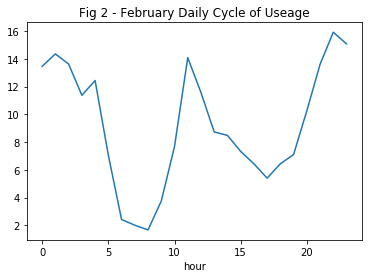

In [12]:
#Plot February daily login
february_hour = february_hourly['count'].plot()
february_hour.set_title('Fig 2 - February Daily Cycle of Useage')

Text(0.5, 1.0, 'Fig 3 - March Daily Cycle of Useage')

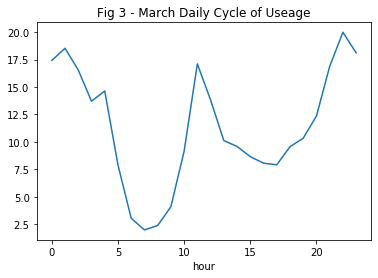

In [13]:
#Plot March daily login
march_hour = march_hourly['count'].plot()
march_hour.set_title('Fig 3 - March Daily Cycle of Useage')

## Observations: 

1. The login data shows the earliest login was 1970-01-01 20:12:16, and the latest login was 1970-04-13 18:57:38; 
2. From the monthly average, the peak hours is between 11:00 AM - 1:00 PM and 9:00 PM - 11:00 PM.
3. There is an usual peak in login time.

In [12]:
for index, row in intervals_hourly.iterrows():
    row['weekend'] = datetime.date(1970,row['month'], row['day']).weekday()

In [13]:
for index, row in intervals_hourly.iterrows():
    if row['weekday'] == 4:
        intervals_hourly.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 5:
        intervals_hourly.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 6:
        intervals_hourly.loc[index, 'weekend'] = 'Yes'
    else:
        intervals_hourly.loc[index, 'weekend'] = 'No'

In [ ]:
weekend_box = sns.boxplot(x="hour", y="count",data=intervals_hourly[intervals_hourly['weekend'] =='Yes'])
weekend_box.set_title('Fig. 4 - Box Plot of daily weekend per hour of useage')

Text(0.5, 1.0, 'Fig 5 - Box Plot of daily weekday per hour of usage')

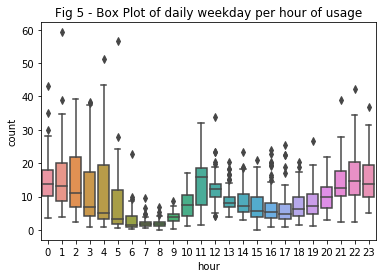

In [14]:
weekday_box = sns.boxplot(x="hour", y="count",data=intervals_hourly[intervals_hourly['weekend'] =='No'])
weekday_box.set_title('Fig 5 - Box Plot of daily weekday per hour of usage')

In [18]:
intervals_daily = intervals.resample('D').sum()
intervals_daily['month'] = intervals_daily.index.month
intervals_daily['day'] = intervals_daily.index.day
intervals_daily['hour'] = intervals_daily.index.hour
intervals_daily['weekday'] = 0

In [19]:
for index, row in intervals_daily.iterrows():
    row['weekday'] = datetime.date(1970,row['month'], row['day']).weekday()

In [20]:
for index, row in intervals_daily.iterrows():
    if row['weekday'] == 4:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 5:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    elif row['weekday'] == 6:
        intervals_daily.loc[index, 'weekend'] = 'Yes'
    else:
        intervals_daily.loc[index, 'weekend'] = 'No'

Text(0.5, 1.0, 'Figure 6 - Weekday Boxplot')

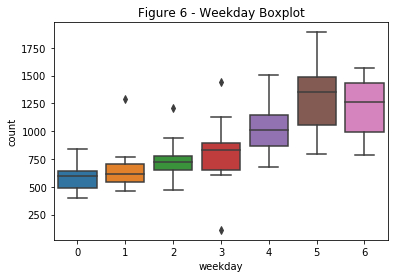

In [21]:
weekdays = sns.boxplot(x='weekday', y='count', data=intervals_daily)
weekdays.set_title('Figure 6 - Weekday Boxplot')

## Observations

1. Based on the three months samples, there is always a peak login at around 11AM - 1PM and 9PM - 11PM.
2. We also observed there is a spike usage during weekend.

Next Step:
1. There seems to be a few outliers per figure 6. There are a few daily datapoints that appear to be higher on Tuesday, Wednesday and Thursday that require further explanation. There may have been a bug or a promotion going on during these days which caused the spikes, however we will still need to explore more. 
2. Based on users logging in, we can target ads at 11AM - 1PM and 9PM - 11PM on average for weekdays (figure - 5). We can also push ads on weekends per figure 6 that users log in more on weekends vs weekdays.</p>

## Part 2-Experiment and Metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A: If the experiment is successful, we would suspet that the activities for these two cities to be roughly the same regardless of time of day. Per the city managers, city activity is measured by the number of cars entering the city (more cars entering the city means more active the city), we will choose the number of cars entering the two cities as the key measure of success of this experiment.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

A: In order to do this, we can have toll booth personnel still at the booths to record the data for going into the respective cities. We would then have two sets of data: one is the number of cars entering Gotham per hour and the other one is the number of cars entering Metropolis per hour. We also need the history data of number of cars entering both cities.

b. what statistical test(s) you will conduct to verify the significance of the
observation

A: If the experiment is successful:

1) there will be higher traffic volumn on the bridge than previously

2) the number of cars entering Gotham is higher than that entering Metropolis in the day and lower in the night.

For 1): Our null hypothesis would be that there is no difference of traffic volumn before and after the experiment. We will test our hypothesis using t-test and calculate p-value under our null hypothesis. If p<0.025(due to this being a one-tail problem), we can conclude that there is increase of traffic volume after reinbursing the toll.

For 2): Our null hypothesis is that there is no difference of number of cars entering Gotham and entering Metropolis. Similar to the above, we would test our null hypothesis using t-test and calculate p-value under null pothesis. If p<0.025, we can conclude number of cars entering Gotham is higher than that entering Metropolis during daytime and lower during night.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

A: If the experimenent works, more policies are needed to encourage the interaction between two cities. For example, city counsel might think of introducing public transportation system to facilitate the interaction between two cities.

## Part 3-Predictive Modeling 

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).


In [16]:
#check ultimate_data_challenge
udc = pd.read_json('ultimate_data_challenge.json')
udc.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0


In [17]:
udc.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,41878.000000,50000.000000,50000,49604,50000.000000,50000,50000.000000,50000.000000,49799.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.617338,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.446652
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.300000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.900000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


In [26]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are some missing data in the "avg_rating_by_driver", "avg_rating_of_driver" and the "phone" column. We can hypothesize that the phone column should have relatively low significance as it is arbitrarily assigned. Our next step is to create our classification variable so we can explore our data and see how the classification varies depending on the variables.

In [18]:
from datetime import  datetime, timedelta
latestDate = datetime.strptime(udc['last_trip_date'].max(), "%Y-%m-%d")
precedingDate = latestDate - timedelta(days=30)
print(precedingDate)

2014-06-01 00:00:00


The date showed above 2014-06-01 00:00:00 is the date counting as retentional users. In other word, any users who have at least one trip after that date will be considered as retentional user.

In [19]:
# create status column and drop trips_in_first_30_days

udc['status'] = udc.last_trip_date.apply(lambda x: 1 if datetime.strptime(x, "%Y-%m-%d") >= precedingDate  else 0)
udc.drop('trips_in_first_30_days', inplace = True, axis = 1)

In [20]:
print(udc['status'].value_counts())

0    31196
1    18804
Name: status, dtype: int64


In [21]:
udc.head(3)

,city,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,status
0,King's Landing,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0


Text(0, 0.5, 'Active rate')

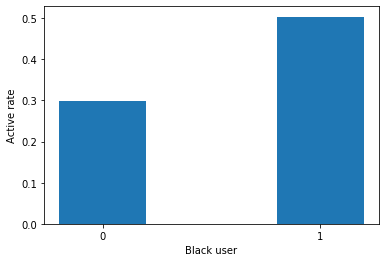

In [33]:
#Compare if black_users tend to stay
black_user = udc.groupby('ultimate_black_user')['status'].mean()

plt.bar(black_user.index, black_user.values, width=0.4)
plt.xticks([0,1])
plt.xlabel('Black user')
plt.ylabel('Active rate')

It turns out black_users tend to stay.

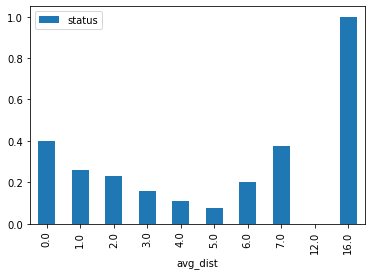

In [36]:
avg_dist_status = pd.concat([udc.avg_dist//10,udc.status],axis = 1).groupby('avg_dist').mean()
avg_dist_status.plot(kind='bar')

Higher distance leads to higher retention.

<BarContainer object of 10 artists>

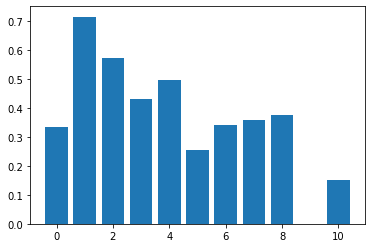

In [37]:
surge_pct_status = pd.concat([udc.surge_pct//10,udc.status],axis = 1).groupby('surge_pct').mean()
plt.bar(surge_pct_status.index, surge_pct_status['status'].values)

Lower surge_pct meaning lower fare leads to higher ratio staying.

<BarContainer object of 6 artists>

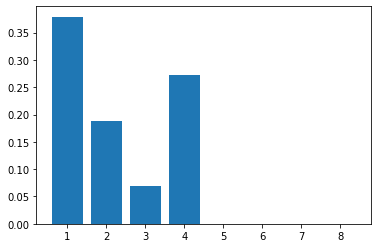

In [38]:
avg_surge_status = pd.concat([udc.avg_surge//1,udc.status],axis = 1).groupby('avg_surge').mean()
plt.bar(avg_surge_status.index, avg_surge_status['status'].values)

Higher avg surge indicates users are from high demanding area, which tends to have the higher rate of active users.

<BarContainer object of 11 artists>

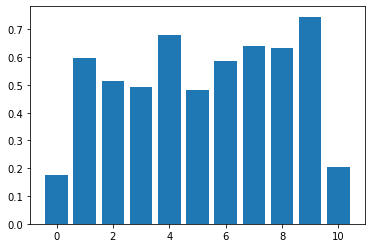

In [40]:
weekday_pct_status = pd.concat([udc.weekday_pct//10,udc.status],axis = 1).groupby('weekday_pct').mean()
plt.bar(weekday_pct_status.index, weekday_pct_status['status'].values)

Higher weekdays percentage means users need service higher.

## Data Wrangling 

In [22]:
#check missing data
print(udc.isnull().sum())

city                       0
signup_date                0
avg_rating_of_driver    8122
avg_surge                  0
last_trip_date             0
phone                    396
surge_pct                  0
ultimate_black_user        0
weekday_pct                0
avg_dist                   0
avg_rating_by_driver     201
status                     0
dtype: int64


In [23]:
# Drop no neccessary columns
udc.drop(['avg_rating_by_driver','avg_rating_of_driver','phone','last_trip_date','signup_date'], axis = 1, inplace=True)

In [25]:
# Convert column 'ultimate_black_user' from bool value to int values
udc.ultimate_black_user = udc.ultimate_black_user.apply(lambda x: 1 if x else 0)

# Seperate avg_dist into 10 parts
udc.avg_dist = pd.qcut(udc.avg_dist, 10, labels = range(1,11))

# Seperate avg_surge into 8 parts
udc.avg_surge = udc.avg_surge//1

# Separate surge_pct into 10 parts
udc.surge_pct = udc.surge_pct//10

# Separate weekday_pct into 10 parts
udc.weekday_pct = udc.weekday_pct//10

In [26]:
#Use OneHotEncoder to transform 'city' column to numerical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

udc['city'] = LabelEncoder().fit_transform(udc['city'])

In [37]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   city                 50000 non-null  int64
 1   avg_surge            50000 non-null  int64
 2   surge_pct            50000 non-null  int64
 3   ultimate_black_user  50000 non-null  int64
 4   weekday_pct          50000 non-null  int64
 5   avg_dist             50000 non-null  int64
 6   status               50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [38]:
# Convert columns to int type
for i in udc.columns:
    udc[i] = udc[i].astype(int)
    
# Make sure no null values
assert udc.isnull().sum().sum()==0

In [39]:
udc.head(3)

,city,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,status
0,1,1,1,1,4,5,1
1,0,1,0,0,5,9,0
2,0,1,0,0,10,1,0


## Model Evaluation 

The weekday_pct variables show most negative values, which indicates the high percentage of weekday users are tend to be retentional.

In [40]:
# Import model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve

# Define model evaluation method
def model_test(model, ytest, y_predict):
    print('The accuracy of {} model is: {:.2f}'.format(model, accuracy_score(ytest, y_predict)))
    print('The confusion matrix is:\n{}'.format(confusion_matrix(ytest, y_predict)))
    print('The auc score is: {:.2f}'.format(roc_auc_score(ytest, y_predict)))
    print('The F1-score is: {:.2f}'.format(f1_score(ytest, y_predict)))

# Define auc plotting method
def plot_roc(model, ytest, y_predict, y_predict_prob):
    fpr, tpr, _ = roc_curve(ytest, y_predict_prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr, label = 'AUC score by {}: {:.2f}'.format(model, roc_auc_score(ytest, y_predict)))
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'best')
    plt.xlim(0,1)
    plt.ylim(0,1)

In [41]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

xdata = udc.drop('status', axis = 1).values
ydata = udc.status

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state= 1)

### Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
rf_predict = rf.predict(xtest)
rf_predict_prob = rf.predict_proba(xtest)[:,1]

In [43]:
model_test('Random Forest', ytest, rf_predict)

The accuracy of Random Forest model is: 0.74
The confusion matrix is:
[[7743 1548]
 [2416 3293]]
The auc score is: 0.71
The F1-score is: 0.62


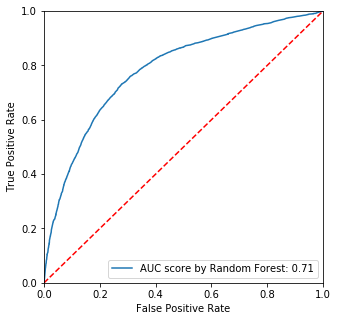

In [44]:
plot_roc('Random Forest',ytest, rf_predict,rf_predict_prob)

In [45]:
rf.feature_importances_

array([0.18215632, 0.00672207, 0.1178037 , 0.10184632, 0.43113955,
       0.16033203])

In [46]:
udc.columns

Index(['city', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'status'],
      dtype='object')

### Support Vector Classifier (SVC)

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [48]:
# Scale the data
scale = StandardScaler()
scale.fit(xtrain)
xtrain_transform = scale.transform(xtrain)
xtest_transform = scale.transform(xtest)

In [49]:
svc = SVC()
svc.fit(xtrain_transform, ytrain)

svc_predict = svc.predict(xtest_transform)

In [50]:
model_test('SVC', ytest, svc_predict)

The accuracy of SVC model is: 0.74
The confusion matrix is:
[[7692 1599]
 [2363 3346]]
The auc score is: 0.71
The F1-score is: 0.63


### KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
knn_predict = knn.predict(xtest)
knn_predict_prob = knn.predict_proba(xtest)[:,1]

In [53]:
model_test('knn', ytest, knn_predict)

The accuracy of knn model is: 0.71
The confusion matrix is:
[[7359 1932]
 [2414 3295]]
The auc score is: 0.68
The F1-score is: 0.60


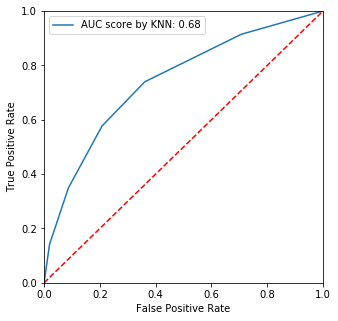

In [54]:
plot_roc('KNN',ytest, knn_predict,knn_predict_prob)

### Gradient Boosting 

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
gb_predict = gb.predict(xtest)
gb_predict_prob = gb.predict_proba(xtest)[:,1]

In [57]:
model_test('Gradient Boosting', ytest, gb_predict)

The accuracy of Gradient Boosting model is: 0.75
The confusion matrix is:
[[7798 1493]
 [2298 3411]]
The auc score is: 0.72
The F1-score is: 0.64


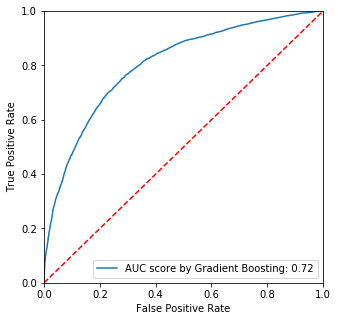

In [58]:
plot_roc('Gradient Boosting', ytest, gb_predict, gb_predict_prob)

In [59]:
# Reduce the threshold to be 0.4, which increase the true positive rate
model_test('Threshould tuned gradient boosting',ytest, (gb_predict_prob>0.4).astype(int))

The accuracy of Threshould tuned gradient boosting model is: 0.74
The confusion matrix is:
[[6884 2407]
 [1557 4152]]
The auc score is: 0.73
The F1-score is: 0.68


Text(0, 0.5, 'True Positive Rate')

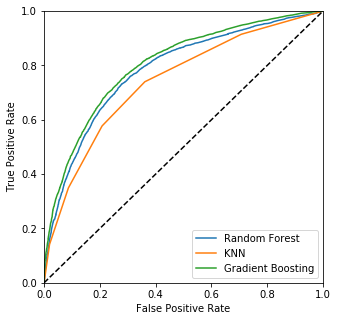

In [60]:
# Comparison of ROC curve for four types of models, it is indicated gradient boosting and neuron network provide the highest AUC score
plt.figure(figsize=(5,5))
for i,j in zip([rf_predict_prob, knn_predict_prob, gb_predict_prob], 
               ['Random Forest', 'KNN', 'Gradient Boosting']):
    fpr, tpr, _ = roc_curve(ytest, i)
    plt.plot(fpr, tpr, label = j)
plt.legend(loc = 'best')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Conclusion 

I utilized numerical and categorical variables to bulid a model to predict active users. My model's accuracy is approximately 74% of prediction,roc-auc score (74%), and f1-score (68%). 

Ultimate could utilize this model to predict active users and improve their service for the users tend to stop usage.